# Filtering

``Filtering`` is employed to remove unwanted frequency components from a given signal;

* ``lowpass`` filtering suppresses frequencies that are higher than a user-defined cut-off frequency (Freq1),
* ``highpass`` filtering allows frequencies that are higher than the cut-off frequency (Freq1) to pass through,
* ``bandpass`` filtering allows signals within a given frequency range (Freq1 to Freq2) bandwidth to pass through and
* ``bandstop`` filtering suppresses signals within the given frequency range (Freq1 to Freq2)-
note that Freq2 cannot be higher than 1/2 of the record's time-step frequency.

To create any of the above four filtering configurations, three classical ``infinite-impulse-response (IIR)``
filter types are available in ``gmspy``: ``Butterworth``, ``Chebyshev`` and ``Bessel`` filters.

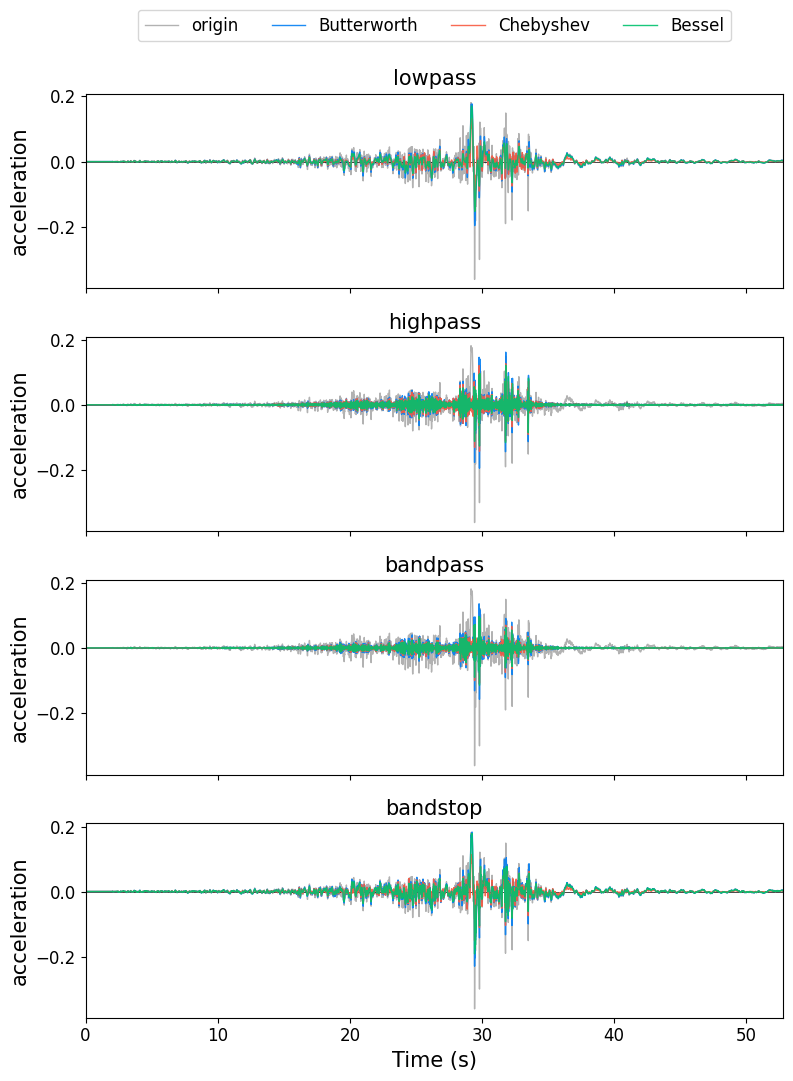

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import gmspy as gm

# %%
# load "ChiChi" records
ts, acc = gm.load_gm_examples('ChiChi')
dt = ts[1] - ts[0]


# %%
# ['lowpass', 'highpass', 'bandpass', 'bandstop']
# ['Butterworth', 'Chebyshev', 'Bessel']

colors = ['#037ef3', '#f85a40', '#00c16e', '#7552cc']

fig, axs = plt.subplots(4, 1, figsize=(9, 12), sharex=True)
for i, b in enumerate(['lowpass', 'highpass', 'bandpass', 'bandstop']):
    ax = axs[i]
    ax.plot(ts, acc, c='gray', lw=1, label="origin", alpha=0.6)
    ax.hlines(0, np.min(ts), np.max(ts), lw=0.5, colors='k')
    ax.set_xlim(np.min(ts), np.max(ts))
    ax.grid(False)
    ax.set_ylabel('acceleration', fontsize=15)
    ax.tick_params(labelsize=12)
    ax.set_title(b, fontsize=15)
    for j, f in enumerate(['Butterworth', 'Chebyshev', 'Bessel']):
        acc2 = gm.freq_filt(dt, acc,
                            ftype=f,  # 'Butterworth', 'Chebyshev', 'Bessel'
                            btype=b,  # 'lowpass', 'highpass', 'bandpass', 'bandstop'
                            order=4,
                            freq1=9,
                            freq2=20,
                            rp=3,
                            plot=False)
        ax.plot(ts, acc2, c=colors[j], lw=1, alpha=0.9, label=f"{f}")
axs[0].legend(fontsize=12, ncol=4, loc='center',
              bbox_to_anchor=(0.5, 1.35))
axs[-1].set_xlabel("Time (s)", fontsize=15)
plt.subplots_adjust(hspace=0.25)
plt.show()